In [1]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from typing import List
from sklearn.preprocessing import PowerTransformer

random.seed(10)

X_train_path = "data/original/solTrainXtrans.txt"
y_train_path = "data/original/solTrainY.txt"
X_test_path = "data/original/solTestXtrans.txt"
y_test_path = "data/original/solTestY.txt"

X_train = pd.read_csv(X_train_path, sep="\t")
y_train = pd.read_csv(y_train_path, sep="\t")
X_test = pd.read_csv(X_test_path, sep="\t")
y_test = pd.read_csv(y_test_path, sep="\t")

### Passo 0 - Exploratory Data Analysis and Dataset Description

In [2]:
print("=========== Preditores ===========")
print(f"Número de preditores: {X_train.shape[1]}")
print(f"Shape (train): {X_train.shape}")
print(f"Shape (test): {X_test.shape}")

print("\n=========== Target ===========")
print(f"Shape (train): {y_train.shape}")
print(f"Shape (test): {y_test.shape}")

=========== Preditores ===========
Número de preditores: 228
Shape (train): (951, 228)
Shape (test): (316, 228)

=========== Target ===========
Shape (train): (951, 1)
Shape (test): (316, 1)


In [3]:
"""
As colunas [:208] são colunas binárias, portanto as métricas estatísticas já são triviais (moda, min, max e etc)
"""

X_train.iloc[:, 208:].describe()

,MolWeight,NumAtoms,NumNonHAtoms,NumBonds,NumNonHBonds,NumMultBonds,NumRotBonds,NumDblBonds,NumAromaticBonds,NumHydrogen,NumCarbon,NumNitrogen,NumOxygen,NumSulfer,NumChlorine,NumHalogen,NumRings,HydrophilicFactor,SurfaceArea1,SurfaceArea2
count,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000
mean,5.199018,3.173918,2.548706,3.176241,3.362257,2.579057,0.925628,0.398110,1.287032,3.695596,3.323978,0.230838,0.747016,0.049753,0.090982,0.120103,0.734091,-0.452796,6.707718,7.081455
std,0.477558,0.457018,0.455234,0.488239,0.881072,1.729708,0.718728,0.382052,1.128680,1.182297,0.986043,0.273948,0.627577,0.130874,0.177213,0.194420,0.538622,1.041293,4.508620,4.672059
min,3.852061,1.791759,1.098612,1.609438,0.743492,0.000000,0.000000,0.000000,0.000000,0.000000,0.770481,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.841320,0.000000,0.000000
25%,4.817086,2.890372,2.197225,2.890372,2.759228,0.798770,0.000000,0.000000,0.000000,2.886887,2.642633,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.250963,3.837096,4.159049
50%,5.194234,3.135494,2.564949,3.178054,3.351388,2.944766,1.098612,0.567077,1.945910,3.691453,3.317541,0.000000,0.693147,0.000000,0.000000,0.000000,0.693147,-0.363024,7.258130,7.759912
75%,5.581012,3.465736,2.890372,3.481122,4.009916,4.023747,1.497866,0.804530,1.945910,4.465209,3.862179,0.456826,1.098612,0.000000,0.000000,0.375000,1.098612,0.279867,9.853650,10.499942
max,6.502505,4.553877,3.871201,4.584967,5.977009,6.702998,2.833213,1.188042,3.258097,7.314252,6.267798,0.707935,2.639057,0.480000,0.495868,0.495868,2.079442,3.533785,23.020337,23.020337


In [4]:
X_test.iloc[:, 208:].describe()

,MolWeight,NumAtoms,NumNonHAtoms,NumBonds,NumNonHBonds,NumMultBonds,NumRotBonds,NumDblBonds,NumAromaticBonds,NumHydrogen,NumCarbon,NumNitrogen,NumOxygen,NumSulfer,NumChlorine,NumHalogen,NumRings,HydrophilicFactor,SurfaceArea1,SurfaceArea2
count,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.00000,316.000000,316.000000,316.000000,316.000000
mean,5.169620,3.143349,2.523316,3.146217,3.320868,2.661990,0.827154,0.358131,1.364523,3.622126,3.313219,0.198702,0.692059,0.032997,0.086255,0.11507,0.747348,-0.541327,6.378626,6.601308
std,0.459274,0.449112,0.440261,0.481334,0.849627,1.672107,0.701013,0.374124,1.110788,1.176129,0.957606,0.270868,0.595009,0.108418,0.176022,0.19448,0.511559,1.051516,4.263582,4.397996
min,4.044279,1.791759,1.386294,1.609438,1.228655,0.000000,0.000000,0.000000,0.000000,0.000000,0.770481,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-2.870902,0.000000,0.000000
25%,4.811406,2.890372,2.197225,2.833213,2.759228,0.798770,0.000000,0.000000,0.000000,2.886887,2.642633,0.000000,0.000000,0.000000,0.000000,0.00000,0.693147,-1.263705,3.837096,3.837096
50%,5.142306,3.135494,2.484907,3.178054,3.351388,2.944766,0.693147,0.567077,1.945910,3.691453,3.110607,0.000000,0.693147,0.000000,0.000000,0.00000,0.693147,-0.481096,6.884369,6.884369
75%,5.540551,3.401197,2.833213,3.433987,3.913012,4.023747,1.386294,0.567077,2.397895,4.324656,3.862179,0.456826,1.098612,0.000000,0.000000,0.37500,1.098612,0.197730,9.506280,9.765805
max,6.173619,4.234107,3.526361,4.276666,5.294621,6.979888,2.833213,1.148118,3.332205,6.822461,5.421759,0.707935,2.302585,0.468750,0.495000,0.49500,1.945910,2.154845,18.431966,18.431966


In [5]:
print(y_train.describe())

                x
count  951.000000
mean    -2.718570
std      2.046641
min    -11.620000
25%     -3.955000
50%     -2.510000
75%     -1.360000
max      1.580000


In [6]:
# Verificação de valores NaN ou Null

print(f"Percentual de valores Nulos (treino): {(X_train.isna().sum() / X_train.shape[0])}")
print(f"Percentual de valores Nulos (teste): {X_test.isna().sum() / X_test.shape[0]}")

Percentual de valores Nulos (treino): FP001                0.0
FP002                0.0
FP003                0.0
FP004                0.0
FP005                0.0
                    ... 
NumHalogen           0.0
NumRings             0.0
HydrophilicFactor    0.0
SurfaceArea1         0.0
SurfaceArea2         0.0
Length: 228, dtype: float64
Percentual de valores Nulos (teste): FP001                0.0
FP002                0.0
FP003                0.0
FP004                0.0
FP005                0.0
                    ... 
NumHalogen           0.0
NumRings             0.0
HydrophilicFactor    0.0
SurfaceArea1         0.0
SurfaceArea2         0.0
Length: 228, dtype: float64


In [7]:
# Uma outra forma de visualizar exatamente qual coluna possui uma porcentagem de valores NaN acim de 0.0
(X_train.isna().sum() / X_train.shape[0]).where(lambda x: x > 0.0).value_counts() # Baseado no output, não se tem nenhum valor NaN
(X_test.isna().sum() / X_train.shape[0]).where(lambda x: x > 0.0).value_counts() # Baseado no output, não se tem nenhum valor NaN

Series([], Name: count, dtype: int64)

Skew original: x   -0.671433
dtype: float64


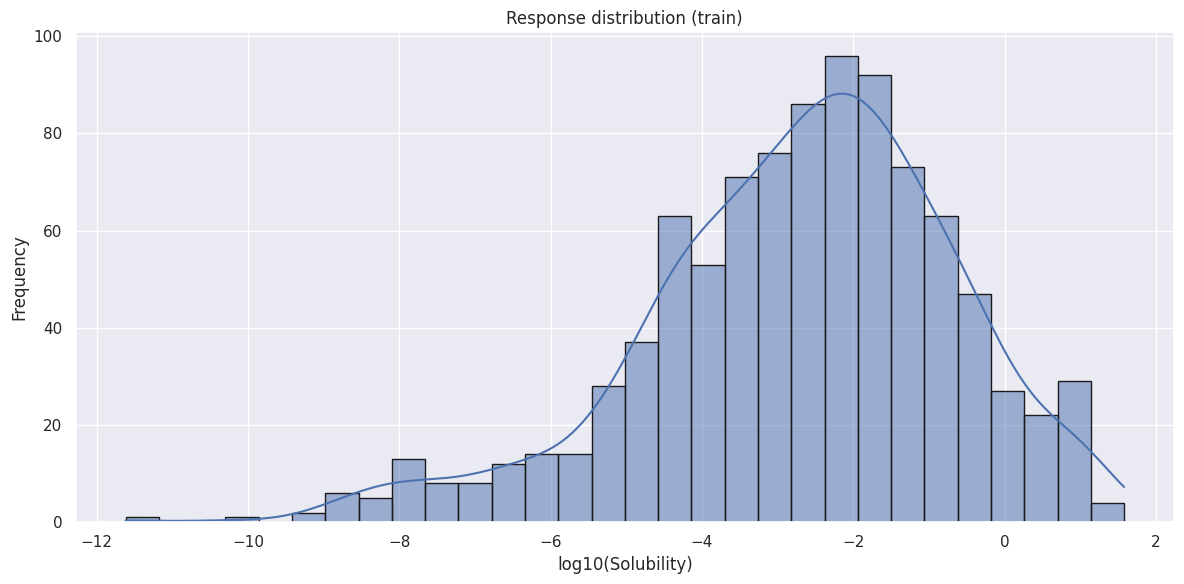

In [8]:
sns.set_theme()
plt.figure(figsize=(12, 6))

print("Skew original:", y_train.skew())

sns.histplot(y_train.values, bins=30, edgecolor="k", kde=True, legend=False)
plt.title("Response distribution (train)")
plt.xlabel("log10(Solubility)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("results/0/hist_quest_0.png", dpi=300)
plt.show()

In [9]:
"""
Após análise do gráfico to target, podemos concluir que ele possui simetria sim, cauda longa a esquerda. Somado a isso, o cálculo para mensurar o skewness
nos mostrou que há necessidade sim de uma transformação.
"""

y_values = y_train.to_numpy().reshape(-1, 1)

pt = PowerTransformer(method="yeo-johnson", standardize=False)

y_transformed = pt.fit_transform(y_values).ravel()

y_train_series = pd.Series(y_transformed)

print("Skew transformada:", y_train_series.skew())

Skew transformada: -0.050273467009724286


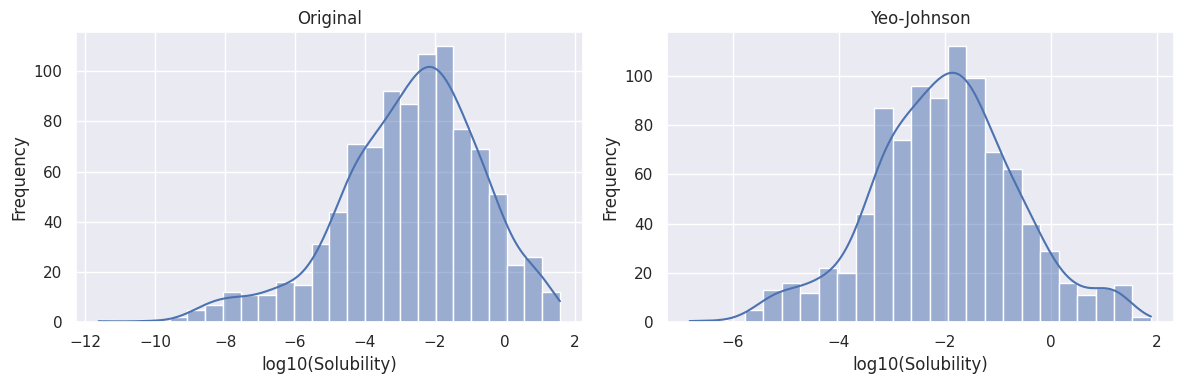

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(y_train.values, kde=True, ax=axes[0], legend=False)
axes[0].set_title("Original")
axes[0].set_xlabel("log10(Solubility)")
axes[0].set_ylabel("Frequency")

sns.histplot(y_train_series, kde=True, ax=axes[1], legend=False)
axes[1].set_title("Yeo-Johnson")
axes[1].set_xlabel("log10(Solubility)")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.savefig("results/0/transform_skewness.png")
plt.show()

In [11]:
fp_cols   = [c for c in X_train.columns if "FP" in c]
cont_cols = [c for c in X_train.columns if c not in fp_cols]

X_fp_train   = X_train[fp_cols]
X_fp_test    = X_test[fp_cols]
X_cont_train = X_train[cont_cols].copy()
X_cont_test  = X_test[cont_cols].copy()

skew_before = X_cont_train.skew()
print("\nSkewness (antes da transformação):")
print(skew_before.sort_values(ascending=False))

X_cont_train_plus1 = X_cont_train + 1.0
X_cont_test_plus1  = X_cont_test  + 1.0

pt = PowerTransformer(method="yeo-johnson", standardize=True)
X_cont_train_bc = pd.DataFrame(
    pt.fit_transform(X_cont_train_plus1.values),
    columns=cont_cols,
    index=X_cont_train_plus1.index,
)
X_cont_test_bc = pd.DataFrame(
    pt.transform(X_cont_test_plus1.values),
    columns=cont_cols,
    index=X_cont_test_plus1.index,
)

skew_after = X_cont_train_bc.skew()
print("\nSkewness (after yeo-johnson):")
print(skew_after.sort_values(ascending=False))

solTrainXtrans_py = pd.concat([X_fp_train, X_cont_train_bc], axis=1)
solTestXtrans_py  = pd.concat([X_fp_test,  X_cont_test_bc],  axis=1)

corr_with_y = (
    X_cont_train_bc.join(y_train.iloc[:, 0].rename("y"))
    .corr()["y"]
    .drop("y")
)
print("\nCorrelação de cada contínuo transformado com y (ordenado por |corr|):")
print(corr_with_y.sort_values(key=np.abs, ascending=False))

top_feats = corr_with_y.sort_values(key=np.abs, ascending=False).head(6).index

for col in top_feats:
    x = X_cont_train_bc[col].to_numpy()
    y = y_train.iloc[:, 0].to_numpy()

    mask = np.isfinite(x) & np.isfinite(y)
    x = x[mask]
    y = y[mask]

    use_lowess = np.unique(x).size >= 5

    sns.regplot(
        x=x,
        y=y,
        lowess=use_lowess,
        scatter_kws={"s": 10, "alpha": 0.5},
        line_kws={"color": "red"},
    )
    plt.xlabel(col)
    plt.ylabel("log10(Solubility)")
    plt.title(f"{col} vs response ({'lowess' if use_lowess else 'linear'})")
    plt.tight_layout()
    plt.savefig(f"results/0/fig_scatter_{col}.png", dpi=300)
    plt.close()


Skewness (antes da transformação):
NumSulfer            2.277927
NumChlorine          1.471964
NumHalogen           1.036444
NumNitrogen          0.427621
NumOxygen            0.187627
NumDblBonds          0.150160
HydrophilicFactor    0.100621
NumRotBonds          0.097665
NumCarbon            0.061839
NumNonHBonds         0.043381
NumRings             0.005590
MolWeight           -0.000217
NumHydrogen         -0.040830
NumNonHAtoms        -0.055774
NumAtoms            -0.071531
NumMultBonds        -0.094965
SurfaceArea1        -0.132028
NumAromaticBonds    -0.146844
SurfaceArea2        -0.168687
NumBonds            -0.188759
dtype: float64

Skewness (after yeo-johnson):
NumChlorine          1.416366
NumHalogen           0.984353
NumNitrogen          0.334491
NumHydrogen          0.035711
NumDblBonds          0.032453
NumBonds             0.015022
NumAtoms             0.007781
NumSulfer            0.000000
NumCarbon           -0.005163
MolWeight           -0.013291
HydrophilicFactor 

/home/felipe/Desktop/graduation/2025.2/ICA/.venv/lib/python3.11/site-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


In [12]:
# Relação preditor–resposta (só diagnóstico)

corr_with_y = (
    X_cont_train_bc.join(y_train.iloc[:,0].rename("y"))
    .corr()["y"]
    .drop("y")
)

print("\nCorrelação de cada contínuo transformado com y (ordenado por |corr|):")
print(corr_with_y.sort_values(key=np.abs, ascending=False))

top_feats = corr_with_y.sort_values(key=np.abs, ascending=False).head(6).index

for col in top_feats:
    x = X_cont_train_bc[col].to_numpy()
    y = y_train.iloc[:,0].to_numpy()

    mask = np.isfinite(x) & np.isfinite(y)
    x = x[mask]
    y = y[mask]

    use_lowess = np.unique(x).size >= 5

    sns.regplot(
        x=x,
        y=y,
        lowess=use_lowess,
        scatter_kws={"s": 10, "alpha": 0.5},
        line_kws={"color": "red"},
    )
    plt.xlabel(col)
    plt.ylabel("log10(solubility)")
    plt.title(f"{col} vs resposta ({'lowess' if use_lowess else 'linear'})")
    plt.tight_layout()
    plt.savefig(f"results/0/fig_scatter_{col}.png", dpi=300)
    plt.close()


Correlação de cada contínuo transformado com y (ordenado por |corr|):
MolWeight            0.347615
NumNonHBonds         0.304123
NumNonHAtoms         0.301504
NumCarbon            0.301046
NumRings             0.257525
NumHalogen           0.256423
NumBonds             0.241104
NumMultBonds         0.231727
NumAtoms             0.228026
NumChlorine          0.203077
HydrophilicFactor   -0.201376
NumAromaticBonds     0.195575
SurfaceArea1        -0.160886
NumOxygen           -0.150429
SurfaceArea2        -0.134306
NumHydrogen          0.093879
NumSulfer            0.063358
NumRotBonds          0.028873
NumNitrogen         -0.016316
NumDblBonds         -0.005851
Name: y, dtype: float64


/home/felipe/Desktop/graduation/2025.2/ICA/.venv/lib/python3.11/site-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


Pre-processing

In [13]:
from sklearn.decomposition import PCA

X_trans = solTrainXtrans_py
pca_full = PCA()
pca_full.fit(X_trans)
explained = pca_full.explained_variance_ratio_
cum_explained = np.cumsum(explained)

plt.plot(np.arange(1, len(explained) + 1), explained * 100, marker="o")
plt.xlabel("Componente principal")
plt.ylabel("Variância explicada (%)")
plt.title("Scree plot (PCA nos preditores transformados)")
plt.grid(True)
plt.tight_layout()
plt.savefig("results/0/fig_pca_scree.png", dpi=300)
plt.close()

plt.plot(np.arange(1, len(cum_explained) + 1), cum_explained * 100, marker="o")
plt.xlabel("Componente principal")
plt.ylabel("Variância acumulada (%)")
plt.title("Variância acumulada (PCA)")
plt.grid(True)
plt.tight_layout()
plt.savefig("results/0/fig_pca_cumulativo.png", dpi=300)
plt.close()

corr_pred = X_cont_train_bc.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_pred, cmap="coolwarm", center=0)
plt.title("Correlação entre preditores contínuos transformados")
plt.tight_layout()
plt.savefig("results/0/fig_corr_continuos.png", dpi=300)
plt.close()

In [47]:
K = 20  # escolha baseada na variância acumulada
pca = PCA(n_components=K)

X_train_pca = pca.fit_transform(solTrainXtrans_py.values)
X_test_pca  = pca.transform(solTestXtrans_py.values)
cols_pca = [f"PC{i+1}" for i in range(K)]

df_train_pca = pd.DataFrame(X_train_pca, columns=cols_pca)
df_test_pca  = pd.DataFrame(X_test_pca,  columns=cols_pca)

df_train_pca.to_csv("data/preprocessed/solTrainX_pca.csv", index=False)
df_test_pca.to_csv("data/preprocessed/solTestX_pca.csv",  index=False)

print("\nDimensões após PCA:")
print("X_train_pca:", df_train_pca.shape)
print("X_test_pca :", df_test_pca.shape)


Dimensões após PCA:
X_train_pca: (951, 20)
X_test_pca : (316, 20)


In [15]:
solTrainXtrans_py.to_csv("data/preprocessed/solTrainXtrans_py.csv", index=False)
solTestXtrans_py.to_csv("data/preprocessed/solTestXtrans_py.csv",  index=False)

Funções dos Erros (R2 e RMSE)

In [16]:
def rmse(y_true, y_pred):
    erro = y_true - y_pred
    mse = np.mean(erro ** 2)
    return np.sqrt(mse)

def r2(y_true, y_pred):
    sqr = np.sum((y_true - y_pred) ** 2)
    sqt = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (sqr / sqt)

### Passo 1 - OLS linear regression model

In [17]:
X_train = pd.read_csv('data/preprocessed/solTrainXtrans_py.csv').values
X_test = pd.read_csv('data/preprocessed/solTestXtrans_py.csv').values

y_train = pd.read_csv('data/original/solTrainY.txt', sep='\s+').values.flatten()
y_test  = pd.read_csv('data/original/solTestY.txt', sep='\s+').values.flatten()

In [18]:
def OLS(X_train, y_train):
    Beta = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ y_train
    return Beta

In [19]:
# Para Calcular os valores preditores:
X_train_new = np.c_[np.ones((X_train.shape[0], 1)), X_train]

X_test_new = np.c_[np.ones((X_test.shape[0], 1)), X_test]

B_Chapeu = OLS(X_train_new, y_train)

y_predict = X_test_new @ B_Chapeu

y_predict

array([ 1.12575298,  0.03694021, -0.39778826,  1.05694109, -0.23126954,
        1.56562894,  0.77829581,  0.89657996,  0.32312685, -0.53798442,
       -0.30501399, -0.95806235,  0.06767941, -0.18385714, -0.68884356,
       -0.48049536, -0.15354074,  0.40709113,  0.35590501, -0.68126652,
        0.53374926,  0.33054011, -0.69044058,  0.04406158, -1.01365072,
        0.12186194, -0.74591902,  1.23540226, -2.05292538, -1.08123551,
       -2.69141978, -0.93672229, -0.66583153, -0.14617585, -0.09693405,
       -1.29150543,  0.31743911, -0.59766324, -0.01139225, -0.60450569,
       -0.83108501, -2.19122201, -1.07637967, -0.2509909 , -1.7013704 ,
       -0.82831666, -0.72468765, -0.89664326, -1.21083494, -0.98213329,
        0.87513425, -1.74002491, -1.4787656 , -1.52025446, -2.19464551,
       -1.26469347, -1.014347  , -1.54310105, -1.8320124 , -1.40899961,
       -0.95073303, -1.30614749, -0.82873301, -1.23527388, -0.96508081,
       -1.93658972, -3.35854459, -1.86105107, -1.47398098, -2.80

#### Comparativo

Implementação do OLS via scikit-learn x Nossa implementação 

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

linear_reg_scikitlearn = LinearRegression()
linear_reg_scikitlearn.fit(X_train, y_train)
y_predict_SL = linear_reg_scikitlearn.predict(X_test)

y_predict_SL

array([ 1.12575298,  0.03694021, -0.39778826,  1.05694109, -0.23126954,
        1.56562894,  0.77829581,  0.89657996,  0.32312685, -0.53798442,
       -0.30501399, -0.95806235,  0.06767941, -0.18385714, -0.68884356,
       -0.48049536, -0.15354074,  0.40709113,  0.35590501, -0.68126652,
        0.53374926,  0.33054011, -0.69044058,  0.04406158, -1.01365072,
        0.12186194, -0.74591902,  1.23540226, -2.05292538, -1.08123551,
       -2.69141978, -0.93672229, -0.66583153, -0.14617585, -0.09693405,
       -1.29150543,  0.31743911, -0.59766324, -0.01139225, -0.60450569,
       -0.83108501, -2.19122201, -1.07637967, -0.2509909 , -1.7013704 ,
       -0.82831666, -0.72468765, -0.89664326, -1.21083494, -0.98213329,
        0.87513425, -1.74002491, -1.4787656 , -1.52025446, -2.19464551,
       -1.26469347, -1.014347  , -1.54310105, -1.8320124 , -1.40899961,
       -0.95073303, -1.30614749, -0.82873301, -1.23527388, -0.96508081,
       -1.93658972, -3.35854459, -1.86105107, -1.47398098, -2.80

In [21]:
def cross_validation(K, X_train, y_train):
    erros_rmse = []
    r2_fold = []
    tam_passo = len(X_train) // K

    for i in range(K):
        # Organizando os índices da fatia
        inicio = i * tam_passo
        fim = (i+1) * tam_passo

        X_test_fold = X_train[inicio:fim]
        y_test_fold = y_train[inicio:fim]

        # Salvando os índices onde o conjunto de testes está, para depois remover os índices do conjunto e criar o conjunto de treinamento
        indices = np.arange(inicio, fim)

        # Criando os conjuntos de treinamento
        X_train_fold = np.delete(X_train, indices, axis=0)
        y_train_fold = np.delete(y_train, indices, axis=0)

        X_train_fold_new = np.c_[np.ones((X_train_fold.shape[0], 1)), X_train_fold]
        betas_fold = OLS(X_train_fold_new, y_train_fold)

        X_test_fold_new = np.c_[np.ones((X_test_fold.shape[0], 1)), X_test_fold]

        y_pred = X_test_fold_new @ betas_fold

        # Calculando o RMSE
        rmse_score = rmse(y_true=y_test_fold, y_pred=y_pred)

        erros_rmse.append(rmse_score)

        # Calculando o R^2 (Coeficiente de Determinação)
        r2_score = r2(y_true=y_test_fold, y_pred=y_pred)

        r2_fold.append(r2_score)
        
    
    media_RMSE = np.mean(erros_rmse)
    media_Rsquared = np.mean(r2_fold)

    return media_RMSE, media_Rsquared


In [22]:
media_rmse, media_Rsquared = cross_validation(5, X_train, y_train)

print(f"R2: {media_Rsquared}")
print(f"RMSE: {media_rmse}")

R2: 0.25789379557395464
RMSE: 0.8222368790306062


Cross-validation via scikit-learn

In [23]:
# Cross-Validation com k = 5 (Calculando o RMSE)
cross_validation_RMSE_sk_5 = cross_val_score(linear_reg_scikitlearn, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')

media_rmse_sklearn_5 = -1 * cross_validation_RMSE_sk_5.mean() # sklearn devolve o valor negativo

# Cross-Validation com k = 10 (Calculando o RMSE)
cross_validation_RMSE_sk_10 = cross_val_score(linear_reg_scikitlearn, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error')

media_rmse_sklearn_10 = -1 * cross_validation_RMSE_sk_10.mean() # sklearn devolve o valor negativo

print(f"RMSE (folds = 5): {media_Rsquared}")
print(f"RMSE (folds = 10): {media_rmse_sklearn_10}")

RMSE (folds = 5): 0.25789379557395464
RMSE (folds = 10): 0.76135424769331


In [24]:
# Cross-Validation com k = 5 (Calculando o R-squared)
cross_validation_Rsquared_sk_5 = cross_val_score(linear_reg_scikitlearn, X_train, y_train, cv=5, scoring='r2')

# Cross-Validation com k = 10 (Calculando o R-squared)
cross_validation_Rsquared_sk_10 = cross_val_score(linear_reg_scikitlearn, X_train, y_train, cv=10, scoring='r2')

media_r2_sklearn = cross_validation_Rsquared_sk_5.mean()
media_r2_sklearn_10 = cross_validation_Rsquared_sk_10.mean()

print(f"R2 (folds = 5): {media_r2_sklearn}")
print(f"R2 (folds = 10): {media_r2_sklearn_10}")

R2 (folds = 5): 0.2578859132665969
R2 (folds = 10): -3.4545147133117746


### Passo 2 - Ridge linear regression model

In [25]:
def fit_ridge_closed_form(X, y, lam):
    XTX = X.T @ X
    I = np.eye(XTX.shape[0])
    eps = 1e-8  # regularização numérica
    beta = np.linalg.solve(XTX + (lam + eps) * I, X.T @ y)
    return beta

def predict_linear(X, beta):
    return X @ beta

In [26]:
from sklearn.model_selection import KFold

lambdas = np.linspace(0.001, 0.10, 15)   # 15 pontos entre 0.001 e 0.10
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)
cv_rmse = []
cv_r2 = []

for lam in lambdas:
    fold_rmses = []
    fold_r2s = []
    for train_idx, val_idx in kf.split(X_train):
        X_tr, X_val = X_train[train_idx], X_train[val_idx]
        y_tr, y_val = y_train[train_idx], y_train[val_idx]

        beta = fit_ridge_closed_form(X_tr, y_tr, lam)
        y_val_pred = predict_linear(X_val, beta)

        fold_rmses.append(rmse(y_true=y_val, y_pred=y_val_pred))
        fold_r2s.append(r2(y_true=y_val, y_pred=y_val_pred))

    cv_rmse.append(np.mean(fold_rmses))
    cv_r2.append(np.mean(fold_r2s))

print("Lambdas e métricas:")
for lam, m_rmse, m_r2 in zip(lambdas, cv_rmse, cv_r2):
    print(f"lambda={lam:.4g}  CV-RMSE={m_rmse:.4f}  CV-R2={m_r2:.4f}")

best_idx = int(np.argmin(cv_rmse))
best_lam = lambdas[best_idx]
print("\nMelhor lambda (CV-RMSE):", best_lam)

Lambdas e métricas:
lambda=0.001  CV-RMSE=0.7132  CV-R2=0.8728
lambda=0.008071  CV-RMSE=0.7145  CV-R2=0.8719
lambda=0.01514  CV-RMSE=0.7158  CV-R2=0.8713
lambda=0.02221  CV-RMSE=0.7167  CV-R2=0.8709
lambda=0.02929  CV-RMSE=0.7173  CV-R2=0.8706
lambda=0.03636  CV-RMSE=0.7177  CV-R2=0.8704
lambda=0.04343  CV-RMSE=0.7179  CV-R2=0.8703
lambda=0.0505  CV-RMSE=0.7180  CV-R2=0.8702
lambda=0.05757  CV-RMSE=0.7181  CV-R2=0.8702
lambda=0.06464  CV-RMSE=0.7181  CV-R2=0.8702
lambda=0.07171  CV-RMSE=0.7181  CV-R2=0.8702
lambda=0.07879  CV-RMSE=0.7180  CV-R2=0.8702
lambda=0.08586  CV-RMSE=0.7179  CV-R2=0.8702
lambda=0.09293  CV-RMSE=0.7178  CV-R2=0.8702
lambda=0.1  CV-RMSE=0.7176  CV-R2=0.8703

Melhor lambda (CV-RMSE): 0.001


In [27]:
beta_best = fit_ridge_closed_form(X_train, y_train, best_lam)
y_train_pred = predict_linear(X_train, beta_best)
y_test_pred  = predict_linear(X_test,  beta_best)
rmse_train = rmse(y_train, y_train_pred)
r2_train   = r2(y_train, y_train_pred)
rmse_test  = rmse(y_test,  y_test_pred)
r2_test    = r2(y_test,   y_test_pred)

In [28]:
print("our implementation:")
print(f"Train: RMSE={rmse_train:.4f}, R2={r2_train:.4f}")
print(f"Test : RMSE={rmse_test:.4f}, R2={r2_test:.4f}")

our implementation:
Train: RMSE=0.4959, R2=0.9412
Test : RMSE=0.7556, R2=0.8674


#### Comparativo

Implementação do OLS via scikit-learn x Nossa implementação 

In [29]:
from sklearn.linear_model import Ridge

ridge_sk = Ridge(alpha=best_lam, fit_intercept=False)
ridge_sk.fit(X_train, y_train)

,alpha,np.float64(0.001)
,fit_intercept,False
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [30]:
y_train_pred_sk = ridge_sk.predict(X_train)
y_test_pred_sk  = ridge_sk.predict(X_test)

rmse_train_sk = rmse(y_train, y_train_pred_sk)
r2_train_sk   = r2(y_train, y_train_pred_sk)

rmse_test_sk  = rmse(y_test,  y_test_pred_sk)
r2_test_sk    = r2(y_test,   y_test_pred_sk)

In [31]:
print("\nscikit-learn:")
print(f"Train: RMSE={rmse_train_sk:.4f}, R2={r2_train_sk:.4f}")
print(f"Test : RMSE={rmse_test_sk:.4f}, R2={r2_test_sk:.4f}")

print("\nCoefficients (our):")
print(beta_best[:5])
print("\nCoefficients (scikit-learn):")
print(ridge_sk.coef_[:5])


scikit-learn:
Train: RMSE=0.4959, R2=0.9412
Test : RMSE=0.7556, R2=0.8674

Coefficients (our):
[ 0.29924282  0.07128758 -0.09273316 -0.28066689  1.59579044]

Coefficients (scikit-learn):
[ 0.29924286  0.07128744 -0.09273316 -0.2806669   1.59579015]


### Passo 3 - PLS linear regression model

In [32]:
# In order to apply the PLS method, we must use the transformed data
X = pd.read_csv('data/preprocessed/solTrainXtrans_py.csv')
# We will center and scale the data, because PLS is not scale invariant and the data presented is in different scales
# We must also load the response variable, center and scale it
X = X.values
Y = pd.read_table('data/original/solTrainY.txt')
Y = (Y.values - Y.values.mean(axis=0))/ Y.values.std(axis=0)

X_test = pd.read_csv('data/preprocessed/solTestXtrans_py.csv')
X_test = X_test.values
Y_test = pd.read_table('data/original/solTestY.txt')
Y_test = (Y_test.values - Y_test.values.mean(axis=0))/ Y_test.values.std(axis=0)

In [33]:
# We will use a loop to calculate the weights, score and apply the deflation for each component
# that will be decided afterwords using cross validation

def PLS(E_input, F_input, n_components):
    ############ PLS ALGORITHM ############
    # Input: 
    #   E: Data matrix of shape (n_samples, n_features)
    #   F: Response matrix of shape (n_samples, 1)
    #   n_components: Number of PLS components to extract
    #
    # Output:
    #   W: Weights matrix of shape (n_features, n_components)
    #   T: Scores matrix of shape (n_samples, n_components)
    #   P: Loadings matrix of shape (n_features, n_components)
    #   b_vector : Coefficients vector
    #######################################
    E = E_input.copy()
    F = F_input.copy()
    n_samples, n_features = E.shape
    # Matriz of weigths of X
    W = np.zeros((n_features, n_components))
    # Matriz of scores of X
    T = np.zeros((n_samples, n_components))
    # Matriz of loadings of X
    P = np.zeros((n_features, n_components))
    # Vector of coefficients
    b_vector = np.zeros((n_components, 1))

    for i in range(n_components):
        # Calculate the X weights
        w = E.T @ F
        w = w / np.linalg.norm(w)
        
        # Calculate the X score
        t = E @ w

        # Calculate the loadings
        p = E.T @ t / (t.T @ t)

        # Calculate b
        b = (F.T @ t) / (t.T @ t)

        # Deflation
        E -= t * p.T # E_new = E - t*p'
        F -= b * t     # F_new = F - t*b
        
        W[:, i] = w.flatten()
        T[:, i] = t.flatten()
        P[:, i] = p.flatten()
        b_vector[i, 0] = b[0, 0]

    
    # Now, we calculate the final coefficients
    # Coefficients matrix
    B_final = W @ np.linalg.inv(P.T @ W) @ b_vector

    return W, T, P, B_final

In [34]:
# Apply PLS with the max number of components
n_components = min(X.shape[0], X.shape[1])
W, T, P, B = PLS(X, Y, n_components)

Correlation: 0.80
Correlation: 0.42


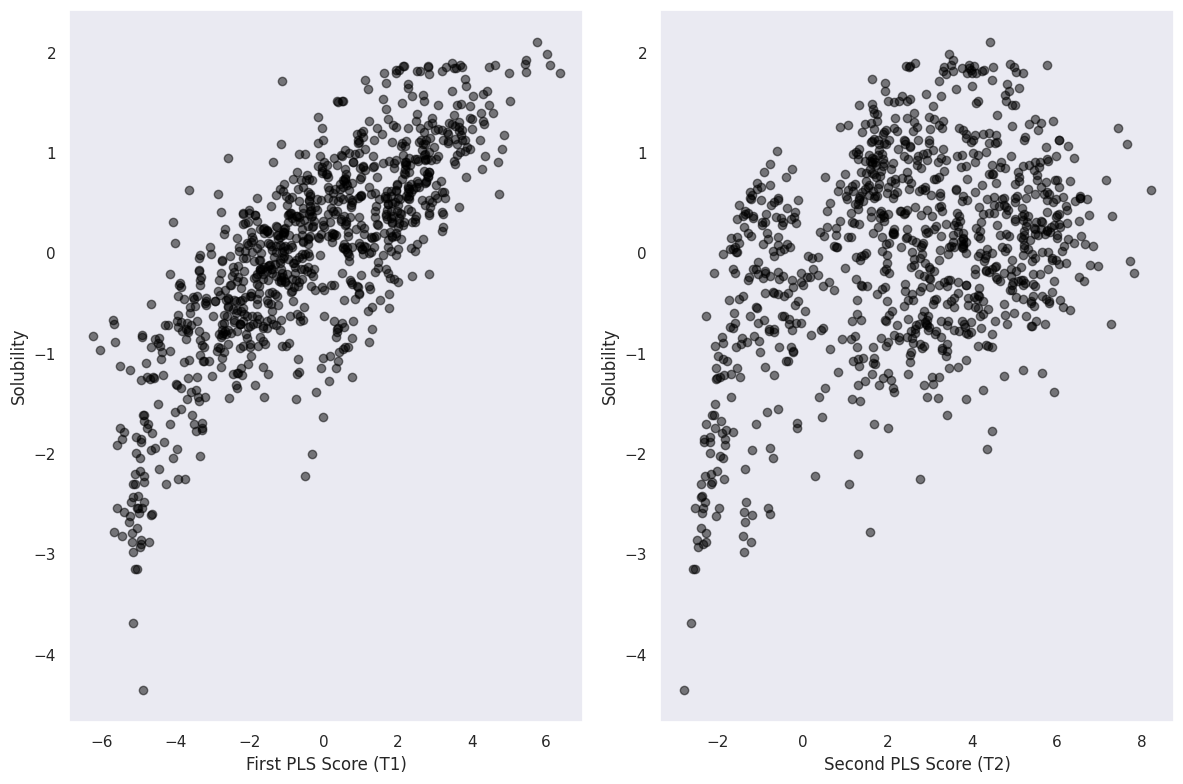

In [35]:
# To a better visualization, we can plot a graph with the first PLS direction and the response (Y)
# We also calculate the correlation coefficient between them
corr_coef = np.corrcoef(T[:,0], Y.flatten())[0,1]
# For the second PLS direction
corr_coef2 = np.corrcoef(T[:,1], Y.flatten())[0,1]
# Subplots

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
print(f"Correlation: {corr_coef:.2f}")
plt.plot(T[:,0], Y, 'o', alpha=0.5, color='black')
plt.xlabel('First PLS Score (T1)')
plt.ylabel('Solubility')
plt.grid()


plt.subplot(1, 2, 2)
print(f"Correlation: {corr_coef2:.2f}")
plt.plot(T[:,1], Y, 'o', alpha=0.5, color='black')
plt.xlabel('Second PLS Score (T2)')
plt.ylabel('Solubility')
plt.grid()

plt.savefig('results/3/pls_scores_vs_response.png')
plt.tight_layout()
plt.show()

# Comparison with the sklearn implementation)/ X_test.values.std(axis=0)
from sklearn.cross_decomposition import PLSRegression
pls = PLSRegression(n_components=n_components)
pls.fit(X, Y)
Y_pred_sklearn = pls.predict(X_test)
Y_pred_own = X_test @ B

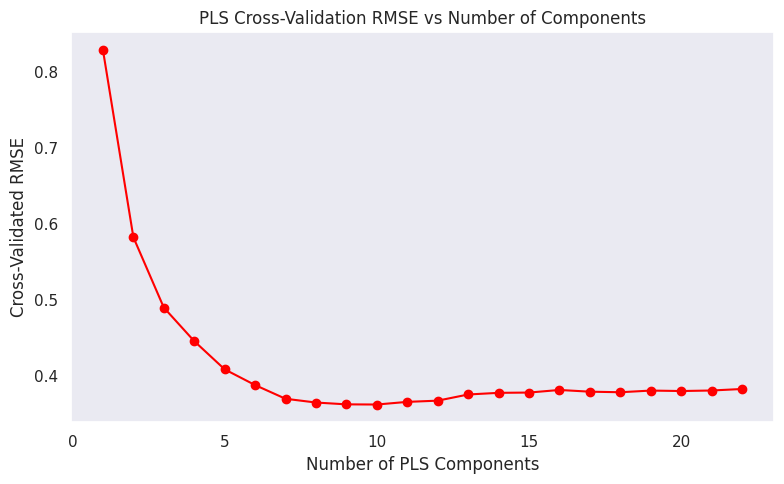

Optimal number of PLS components: 10
RMSE at optimal components: 0.3624221207
R² for the optimal PLS model with 10 components: 0.9099


In [36]:
# Now, we must use the k-fold cross validation to find the number of componentes that minimazes the RMSE
def cross_validation_pls(X, Y, max_components, k_folds):
    n_samples = X.shape[0]
    fold_size = n_samples // k_folds
    rmse_list = []


    for n_comp in range(1, max_components + 1):
        rmse_folds = []
        for k in range(k_folds):
            start = k * fold_size
            end = (k + 1) * fold_size if k != k_folds - 1 else n_samples

            X_val = X[start:end]
            Y_val = Y[start:end]
            X_train = np.concatenate((X[:start], X[end:]), axis=0)
            Y_train = np.concatenate((Y[:start], Y[end:]), axis=0)

            W, T, P, B = PLS(X_train, Y_train, n_comp)
            Y_val_pred = X_val @ B
            rmse_fold = np.sqrt(np.mean((Y_val - Y_val_pred) ** 2))
            rmse_folds.append(rmse_fold)

        rmse_list.append(np.mean(rmse_folds))

    return rmse_list

max_components = 22
rmse_cv = cross_validation_pls(X, Y, max_components, k_folds=5)
# Plot the RMSE vs number of components
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), rmse_cv, marker='o', color='red')
plt.xlabel('Number of PLS Components')
plt.ylabel('Cross-Validated RMSE')
plt.title('PLS Cross-Validation RMSE vs Number of Components')
plt.grid()
plt.tight_layout()
plt.savefig('results/3/pls_cv_rmse.png')
plt.show()

# Extracting the optimal number of components
optimal_components = np.argmin(rmse_cv) + 1
print(f"Optimal number of PLS components: {optimal_components}")
print(f"RMSE at optimal components: {rmse_cv[optimal_components - 1]:.10f}")

# Calculate R² for the optimal model
W_opt, T_opt, P_opt, B_opt = PLS(X, Y, optimal_components)
Y_pred_opt = X @ B_opt
ss_total = np.sum((Y - np.mean(Y))**2)
ss_residual = np.sum((Y - Y_pred_opt)**2)
r_squared = 1 - (ss_residual / ss_total)
print(f"R² for the optimal PLS model with {optimal_components} components: {r_squared:.4f}")   

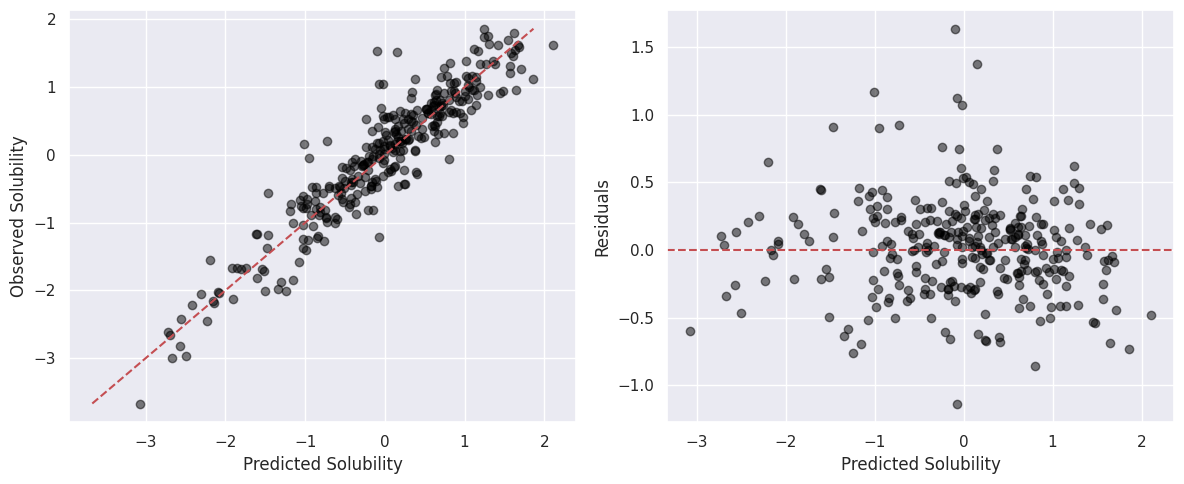

In [37]:
# Now, we can plot and compare visualy the predictions of PLS with the observed response variable and also compare the residual, that can be done using the test set
Y_test_pred_opt = X_test @ B_opt
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.ylabel('Observed Solubility')
plt.xlabel('Predicted Solubility')
plt.scatter(Y_test_pred_opt, Y_test, alpha=0.5, color='black')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')

plt.subplot(1, 2, 2)
residuals = Y_test - Y_test_pred_opt
plt.scatter(Y_test_pred_opt, residuals, alpha=0.5, color='black')
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Solubility')
plt.ylabel('Residuals')

plt.tight_layout()
plt.savefig('results/3/pls_predictions_residuals.png')
plt.show()

### Passo 4 - MLP, a non-linear regression model

In [38]:
class OurMLPRegressor:
    def __init__(self, input_shape, hidden_shape, output_shape) -> None:
        self.input_shape = input_shape
        self.hidden_shape = hidden_shape
        self.output_shape = output_shape
        self.num_layers = len(hidden_shape) + 1

        self.rng = np.random.default_rng(2000)

        # Initialize the weights and biases for each layer using Xavier initialization
        self.weights: List[np.ndarray] = []
        self.biases: List[np.ndarray] = []

        sizes = [input_shape] + hidden_shape + [output_shape]
        for i in range(1, self.num_layers + 1):
            fan_in, fan_out = sizes[i - 1], sizes[i]
            limit = np.sqrt(6.0 / (fan_in + fan_out))
            w = self.rng.uniform(-limit, limit, size=(fan_out, fan_in)).astype(np.float32)
            b = np.zeros((fan_out, 1), dtype=np.float32)
            self.weights.append(w)
            self.biases.append(b)
    
    def forward(self, X):
        # Ensure numpy array with correct dtype
        X = np.asarray(X, dtype=np.float32)
        # Basic shape check
        if X.shape[0] != self.input_shape:
            raise ValueError(f"Expected X with shape ({self.input_shape}, m), got {X.shape}")

        # Forward pass through the network
        self.activations: List[np.ndarray] = [X]
        self.z = []

        for i in range(self.num_layers):
            #print("DEBUG - Forward section: started")
            #print(f"Shape of weights: {self.weights[i].shape}")
            #print(f"Shape of activations: {self.activations[i].shape}")
            #print(f"Shape of biases: {self.biases[i].shape}")
            #print("DEBUG - Forward section: finished")

            z = np.dot(self.weights[i], self.activations[i]) + self.biases[i]
            self.z.append(z)
            if i < self.num_layers - 1:
                a = self.tanh(z)  # Tanh activation for hidden layers
            else:
                a = z  # Linear activation for output layer
            self.activations.append(a)
        return self.activations[-1]  # shape: (output_size, m)

    def backward(self, y):
        # Ensure numpy array
        y = np.asarray(y, dtype=np.float32)

        # Make sure y has shape (output_dim, m)
        if y.ndim == 1:
            y = y.reshape(-1, 1)

        # Number of training examples based on stored input
        m = self.activations[0].shape[1]

        # Compute gradients
        gradients = []
        dZ = self.activations[-1] - y  # shape: (output_size, m)
        for i in range(self.num_layers - 1, -1, -1):
            dW = (1 / m) * np.dot(dZ, self.activations[i].T)  # shape: (sizes[i], sizes[i-1])
            db = (1 / m) * np.sum(dZ, axis=1, keepdims=True)  # shape: (sizes[i], 1)
            gradients.append((dW, db))
            
            if i > 0:
                dA = np.dot(self.weights[i].T, dZ)  # shape: (sizes[i-1], m)
                #a_prev = self.activations[i]
                dZ = dA * self.gradient_tanh(self.z[i-1])  # shape: (sizes[i-1], m)

        return gradients[::-1]  # Reverse the gradients

    def update_parameters(self, gradients, learning_rate):
        # Update parameters using gradients and learning rate
        for i in range(self.num_layers):
            self.weights[i] -= learning_rate * gradients[i][0]
            self.biases[i] -= learning_rate * gradients[i][1]

    def tanh(self, Z):
        # Hyperbolic tangent (tanh) activation function
        return np.tanh(Z)

    def gradient_tanh(self, Z):
        # Gradient of the hyperbolic tangent (tanh) activation function
        return 1 - np.tanh(Z)**2

In [39]:
# Training parameters
num_epochs = 1000
learning_rate = 0.1

# Define the MLP model
hidden_sizes = [30, 30]
output_size = Y.shape[1]
input_size = X.shape[1]

print(f"input_size: {input_size}")
print(f"output_size: {output_size}")

input_size: 228
output_size: 1


In [40]:
mlp = OurMLPRegressor(input_size, hidden_sizes, output_size)

In [41]:
X.shape

(951, 228)

In [42]:
Y.T.shape

(1, 951)

In [43]:
losses={}

for i, epoch in enumerate(range(num_epochs)):
    outputs = mlp.forward(X.T)        # (n_features, m)
    gradients = mlp.backward(Y.T)     # (1, m)
    mlp.update_parameters(gradients, learning_rate)

    # RMSE
    diff = outputs - Y.T
    loss = np.sqrt(np.mean(diff ** 2))
    losses[i]=loss
    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch+1} - Loss: {loss:.6f}")

Epoch 100 - Loss: 0.321989
Epoch 200 - Loss: 0.273601
Epoch 300 - Loss: 0.247181
Epoch 400 - Loss: 0.228740
Epoch 500 - Loss: 0.214331
Epoch 600 - Loss: 0.202357
Epoch 700 - Loss: 0.192043
Epoch 800 - Loss: 0.182964
Epoch 900 - Loss: 0.174861
Epoch 1000 - Loss: 0.169279


#### Comparativo

Implementação do MLP via scikit-learn x Nossa implementação

In [44]:
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(random_state=1, max_iter=2000, tol=0.1)
regr.fit(X, Y)

/home/felipe/Desktop/graduation/2025.2/ICA/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1771: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,loss,'squared_error'
,hidden_layer_sizes,"(100,)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,2000
,shuffle,True


In [45]:
# Testing
test_outputs = mlp.forward(X_test.T)

diff_test = y_test - test_outputs
SSE = np.sum(diff_test ** 2)

y_test_mean = np.mean(test_outputs)
diff_total = y_test - y_test_mean
tss = np.sum(diff_total ** 2)

rmse_loss = np.sqrt(np.mean(diff_test ** 2))

rmse_score = rmse(y_true=y_test, y_pred=test_outputs)
r2_score = r2(y_true=y_test, y_pred=test_outputs)

print(f"R2: {r2_score}")
print(f"RMSE: {rmse_loss}")

R2: -1.0905645861936852
RMSE: 3.0004592576077176


Figure - Loss x Epoch

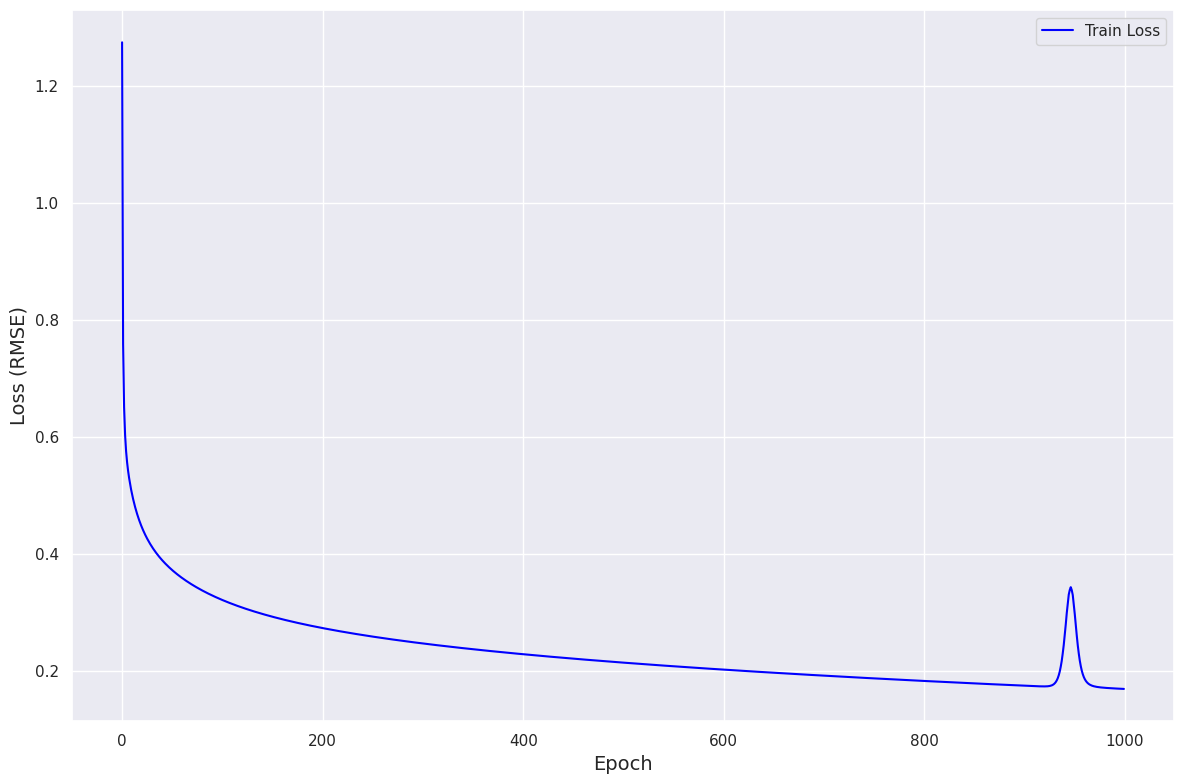

In [46]:
epochs = list(losses.keys())
loss_values = list(losses.values())

fig = plt.figure(figsize=(12,8))
sns.lineplot(x=epochs, y=loss_values, label='Train Loss', color='blue')
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss (RMSE)', fontsize=14)
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig("results/4/train_loss.png")
plt.show()